<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/10%20Generative%20Adversarial%20Network/Auxiliary%20Classifier%20GAN/auxiliary_classifier_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auxiliary Classifier Generative Adversarial Network

A conditional generative adversarial network, or cGAN, is a type of GAN that involves the conditional generation of images by a generator model. Image generation can be conditional on a class label, if available, allowing the targeted generated of images of a given type. An ***Auxiliary Classifier GAN***, or ***AC-GAN***, is an extension of the conditional GAN that changes the discriminator to predict the class label of a given image rather than receive it as input. It has the effect of stabilizing the training process and allowing the generation of large high-quality images whilst learning a representation in the latent space that is independent of the class label.


acgan.py in this folder is from https://github.com/eriklindernoren/Keras-GAN, it is trained at a local machine for 5 - 8 hours and the model is saved. In this practice we will load the saved models and make predictions.



In [1]:
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [9]:
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Auxiliary%20Classifier%20GAN/saved_model/discriminator.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Auxiliary%20Classifier%20GAN/saved_model/generator.json
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Auxiliary%20Classifier%20GAN/saved_model/discriminator_weights.hdf5
!wget https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Auxiliary%20Classifier%20GAN/saved_model/generator_weights.hdf5

--2019-08-22 16:24:58--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Auxiliary%20Classifier%20GAN/saved_model/discriminator.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6339 (6.2K) [text/plain]
Saving to: ‘discriminator.json.1’

discriminator.json. 100%[===================>]   6.19K  --.-KB/s    in 0s      

2019-08-22 16:24:58 (79.9 MB/s) - ‘discriminator.json.1’ saved [6339/6339]

--2019-08-22 16:24:59--  https://raw.githubusercontent.com/jchen8000/MachineLearning/master/10%20Generative%20Adversarial%20Network/Auxiliary%20Classifier%20GAN/saved_model/generator.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connectin

In [11]:
!ls

discriminator.json    discriminator_weights.hdf5  generator_weights.hdf5
discriminator.json.1  generator.json		  sample_data


In [0]:
def load_model(model_name):
    model_path = "%s.json" % model_name
    weights_path = "%s_weights.hdf5" % model_name
    
    
    json_file = open(model_path, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    loaded_model.load_weights(weights_path)
    
    return loaded_model


def predicted_images(r, c, sampled_labels):

    noise = np.random.normal(0, 1, (r * c, 100))
    gen_imgs = generator.predict([noise, sampled_labels])
    # Rescale images 0 - 1
    gen_imgs = 0.5 * gen_imgs + 0.5

    fig, axs = plt.subplots(r, c, figsize=(c,r))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    plt.show()
    

In [0]:
#Load saved models
generator = load_model("generator")
discriminator = load_model("discriminator")



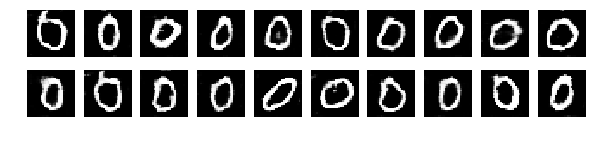

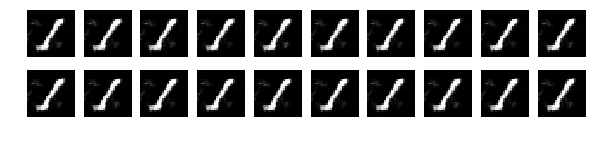

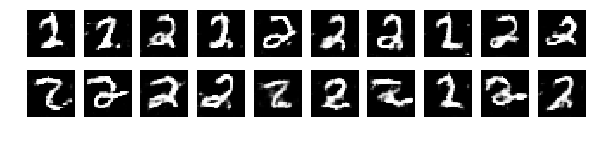

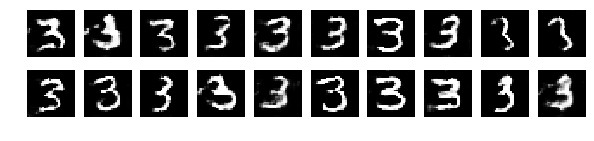

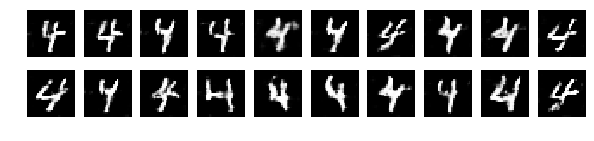

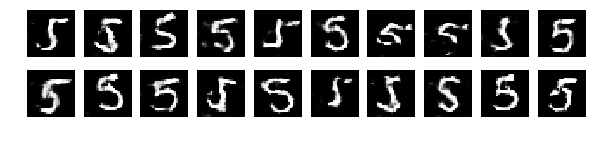

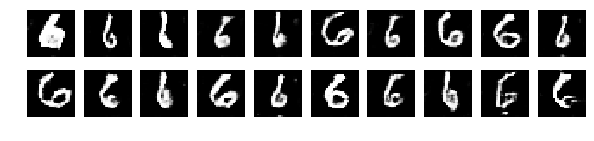

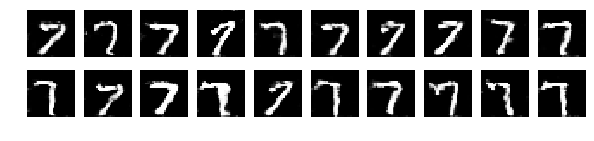

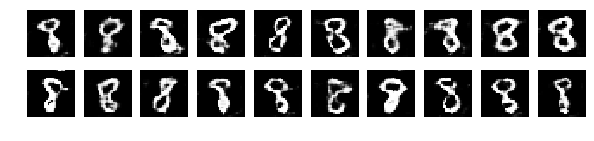

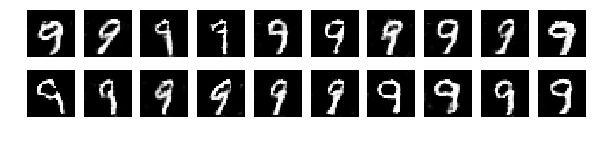

In [36]:
#Make predictions and plot the results

row=2
col=10

for num in range(10):
    sample_labels = np.array([num for _ in range(r*c)])
    predicted_images(row, col, sample_labels)